# The Beginning
These first few rows are my very first attempts at EDA on this data. It took a little while for me
to wrap my head around how to structure and use it all.

In [1]:
import numpy as np
import pandas as pd
from pandas.errors import ParserError
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
df = pd.read_csv('../data/CE.txt', sep='\t')
df.describe() # type: ignore

,47.202,47.273,47.25,47.332,47.213,47.372,47.273.1,47.438,46.691,46.599,...,31.554,30.953,30.639,30.561,30.368,30.224,29.79,29.261,29.287,28.866
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,...,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.00000,2204.000000,2204.000000,2204.000000,2204.000000
mean,31.318409,31.357388,31.388574,31.395224,31.388196,31.363756,31.344041,31.331760,31.300873,31.231591,...,31.087688,31.120404,31.142920,31.156252,31.152385,31.13504,31.126395,31.126058,31.146084,31.281630
std,11.529829,11.510140,11.501724,11.501755,11.518748,11.536731,11.564274,11.576712,11.569682,11.536470,...,11.517271,11.495249,11.480866,11.477837,11.486341,11.50636,11.527596,11.535691,11.535977,11.549611
min,17.356000,17.552000,17.440000,17.416000,17.392000,17.404000,17.456000,17.396000,17.506000,17.364000,...,17.293000,17.283000,17.188000,17.271000,17.314000,17.20100,17.283000,17.201000,17.324000,17.332000
25%,20.163250,20.259250,20.331250,20.385250,20.366000,20.328000,20.239750,20.148250,20.112500,20.070250,...,19.943250,20.014500,20.078750,20.143000,20.150000,20.12700,20.067250,20.013250,19.990750,20.115000
50%,27.333500,27.396500,27.442000,27.453000,27.423500,27.383000,27.354000,27.350000,27.351000,27.311000,...,27.059500,27.099500,27.115000,27.122500,27.115000,27.08700,27.067000,27.072500,27.104000,27.250000
75%,46.650250,46.672750,46.687000,46.686000,46.693000,46.686000,46.709500,46.698000,46.676500,46.544000,...,46.415750,46.397750,46.420250,46.424500,46.448000,46.45425,46.462000,46.467500,46.485000,46.625250
max,48.136000,48.057000,48.124000,48.112000,48.159000,48.253000,48.158000,48.219000,48.146000,48.040000,...,47.923000,48.042000,47.947000,47.876000,47.946000,48.03000,47.994000,48.005000,47.964000,48.266000


In [3]:
df.head()

,47.202,47.273,47.25,47.332,47.213,47.372,47.273.1,47.438,46.691,46.599,...,31.554,30.953,30.639,30.561,30.368,30.224,29.79,29.261,29.287,28.866
0,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,23.995,24.328,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588
1,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.711,21.564,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519
2,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.687,20.703,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403
3,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.887,19.919,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016
4,19.651,19.635,19.533,19.627,19.073,19.202,19.202,19.116,18.652,18.645,...,19.402,19.428,19.447,19.325,19.348,19.254,19.160,19.336,19.257,19.377


## Pulling in the Predictor Values
Below is just a quick loop that stores each `txt` file as its own *DataFrame* object and sticks them
all in a dictionary where their **key** is the 'basename' of each file path.

In [4]:
cwd = os.getcwd()
print(cwd)
tables = {}
for itm in glob.iglob("../**/*.txt"):
    id = os.path.basename(itm)
    id = id[:-4]
    if id in ["documentation", "description", "profile"]:
        continue
    print(id)
    try:
        tables.update({id: pd.read_csv(itm, header=None,  sep='\t')})
    except ParserError as err:
        print(err)
        continue

/Users/skyejeanat/Documents/Flatiron/Projects/dsc-Phase_3-Porject/v_skye
SE
PS1
TS4
PS2
PS3
TS3
VS1
TS2
PS6
PS4
TS1
PS5
CP
CE
EPS1
FS1
FS2


**The cell below is a nice visual of the data structure**. Each table in the dictionary has equal
numbers of rows, and a column count that cooresponds to the frequency of samples taken during each
pump cycle.

In [5]:
count = 0
for table in list(tables.keys()):
    print(table)
    print(tables[table].shape)

SE
(2205, 60)
PS1
(2205, 6000)
TS4
(2205, 60)
PS2
(2205, 6000)
PS3
(2205, 6000)
TS3
(2205, 60)
VS1
(2205, 60)
TS2
(2205, 60)
PS6
(2205, 6000)
PS4
(2205, 6000)
TS1
(2205, 60)
PS5
(2205, 6000)
CP
(2205, 60)
CE
(2205, 60)
EPS1
(2205, 6000)
FS1
(2205, 600)
FS2
(2205, 600)


## Structure of the Data
**Okay, so the structure of the data is this:**
1. The rows represent 1 cycle of the hydraulic test rig.
2. The individual txt files are sensor readings, rows represent a cycle, each column is a reading
   from that specific sensor.
3. Readings from each table are given in hz, and each cycle lasted 60 seconds. So, a 1hz sensor
   provides a 60 column by 2205 row table.
4. "Profile.txt" contains a 5 column by 2205 row table with system states encoded in each column.

## The Condition Encodings
The `profile.txt` table contains the recorded pump conditions for each cycle (row). Below I am
intitializing a dictionary to hold basic information about each table. This along with the dictionary
of sensor information that follows will help establish a base on which to build out our model
functionality.

Practically, anytime we need to use this information in the future we can refer to it here, and 
if we decide we need to change it later we can do it once here and those changes will propagate
through the rest of our program automatically.

In [6]:
# Create a dictionary that will translate the values in "Profile.txt" into their text categories 
# describing the state of the test rig for each cycle.
encoding = {
        "Cooler Condition / %": {
             3:"close to failure",
             20:"reduced efficiency",
             100:"full eficiency",
            },
        "Valve Condition / %": {
             100:"optimal switching behavior",
             90:"small lag",
             80:"severe lag",
             73:"close to total failure"
            },
        "Internal pump leakage": {
             0:"no leakage",
             1:"weak leakage",
             2:"severe leakage"
            },
        "Hydraulic accumulator / bar": {
             130:"optimal pressure",
             115:"slightly reduced pressure",
             100:"severely reduced pressure",
             90:"close to total failure"
            },
        "stable flag": {
             0:"conditions were stable",
             1:"static conditions might not have been reached yet",
            }
        }

In [7]:
encoding.keys()

dict_keys(['Cooler Condition / %', 'Valve Condition / %', 'Internal pump leakage', 'Hydraulic accumulator / bar', 'stable flag'])

### Predictor Variables
I am going to create another dictionary below that maps the sensor table short hand names to something
more readable. As I add features it will be more and more important to keep everything straight. To
keep things straight it will be important to only refer to common information from a single point.

This will help keep naming conventions and data meanings clear and will come in handy later if I 
want to scale the rows in each column proportionally in some way that requires using their frequency
or respecting their unit of measurement.

#### Sensor Frequencies and Other ID Info:

In [8]:
sensor_dict = {
        "PS1": {
            "name": None,
            "type": "pressure",
            "unit": "bar",
            "samp_rate": 100,
            }, 
        "PS2": {
            "name": None,
            "type": "pressure",
            "unit": "bar",
            "samp_rate": 100,
            }, 
        "PS3": {
            "name": None,
            "type": "pressure",
            "unit": "bar",
            "samp_rate": 100,
            }, 
        "PS4": {
            "name": None,
            "type": "pressure",
            "unit": "bar",
            "samp_rate": 100,
            }, 
        "PS5": {
            "name": None,
            "type": "pressure",
            "unit": "bar",
            "samp_rate": 100,
            }, 
        "PS6": {
            "name": None,
            "type": "pressure",
            "unit": "bar",
            "samp_rate": 100,
            }, 
        "EPS1": {
            "name": None,
            "type": "motor_power",
            "unit": "W",
            "samp_rate": 100,
            }, 
        "FS1": {
            "name": None,
            "type": "volume_flow",
            "unit": "l/min",
            "samp_rate": 10,
            }, 
        "FS2": {
            "name": None,
            "type": "volume_flow",
            "unit": "l/min",
            "samp_rate": 10,
            }, 
        "TS1": {
            "name": None,
            "type": "temperature",
            "unit": "Ã‚Â°C",
            "samp_rate": 1,
            }, 
        "TS2": {
            "name": None,
            "type": "temperature",
            "unit": "Ã‚Â°C",
            "samp_rate": 1,
            }, 
        "TS3": {
            "name": None,
            "type": "temperature",
            "unit": "Ã‚Â°C",
            "samp_rate": 1,
            }, 
        "TS4": {
            "name": None,
            "type": "temperature",
            "unit": "Ã‚Â°C",
            "samp_rate": 1,
            }, 
        "VS1": {
            "name": None,
            "type": "vibration",
            "unit": "mm/s",
            "samp_rate": 1,
            }, 
        "CE": {
            "name": None,
            "type": "cooling_efficiency",
            "unit": "percent",
            "samp_rate": 1,
            }, 
        "CP": {
            "name": None,
            "type": "cooling_power",
            "unit": "kW",
            "samp_rate": 1,
            }, 
        "SE": {
            "name": None,
            "type": "efficiency_factor",
            "unit": "percent",
            "samp_rate": 1,
            }
        }

### Adding Names Programmatically
Here I am going to add names to the dictionary using a function so that if later I need or want
to change them I already have quick and easy way to do that.

In [9]:
def rename_cols(data_dict=None, input_str=None, numbers=True,  *args, **kwargs):
    """A function to rename my columns from a dictionary containing information about
       each sensor.
            Args:
                data_dict ('dict'): The dictionary that will be processed
                    by the function. This dictionary should be built into the
                    feature extraction process.
                numbers (bool, 'defualt' = True): Tells the function whether or not to use the
                    numbers from the sensor dict keys in the output names.
                input_str ('str', optional): An input string to be proccessed
                    by the function.

            Returns:
                A dictionary with <sensor>['name'] field reprocessed
    """
    if data_dict is None:
        return None
    if input_str is None:
        input_str = ""

    for key in data_dict.keys():
        name = data_dict[key]['type'][:4]
        base = key
        num = ""
        num = ""
        if key[-1].isdigit() and numbers is True:
            num = f"_{key[-1]}"
            base = key[0:-1]
        if len(input_str) > 0:
            base = f"{input_str}"
        data_dict[key]['name'] = f"{base}_{name}{num}"

    return None

In [10]:
rename_cols(sensor_dict, "", True)

In [11]:
sensor_dict['PS1']['name']

'PS_pres_1'

# Target Variables
**Now that we can see the structure** of our target variables a little more clearly lets take a
look at the `profile.txt` file in our dataset. 

I will pull it inot a primary DataFrame object, so that we can continue to work with it; adding 
predictor variables and iterating over a test pipeline to find the best combinations for prediction.

Setting this up just requires pulling in the five columns and assigning column names based on our
encoding keys from the above dictionary.

In [12]:
target_cols = list(encoding.keys())
df = pd.read_csv('../data/profile.txt', sep='\t', header=None, names=target_cols)
print(df.shape)
df.head()

(2205, 5)


,Cooler Condition / %,Valve Condition / %,Internal pump leakage,Hydraulic accumulator / bar,stable flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


### Graphing the Cycles
The columns of our DataFrame give us the encoded status of the test rig, and the rows represent
each 60 second test cycle. That means we can graph these cycles to get a sense of the testing setup
we will be trying to predict.

Below I quickly iterate through the columns. Plotting each test components status for each cycle.

In [13]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())

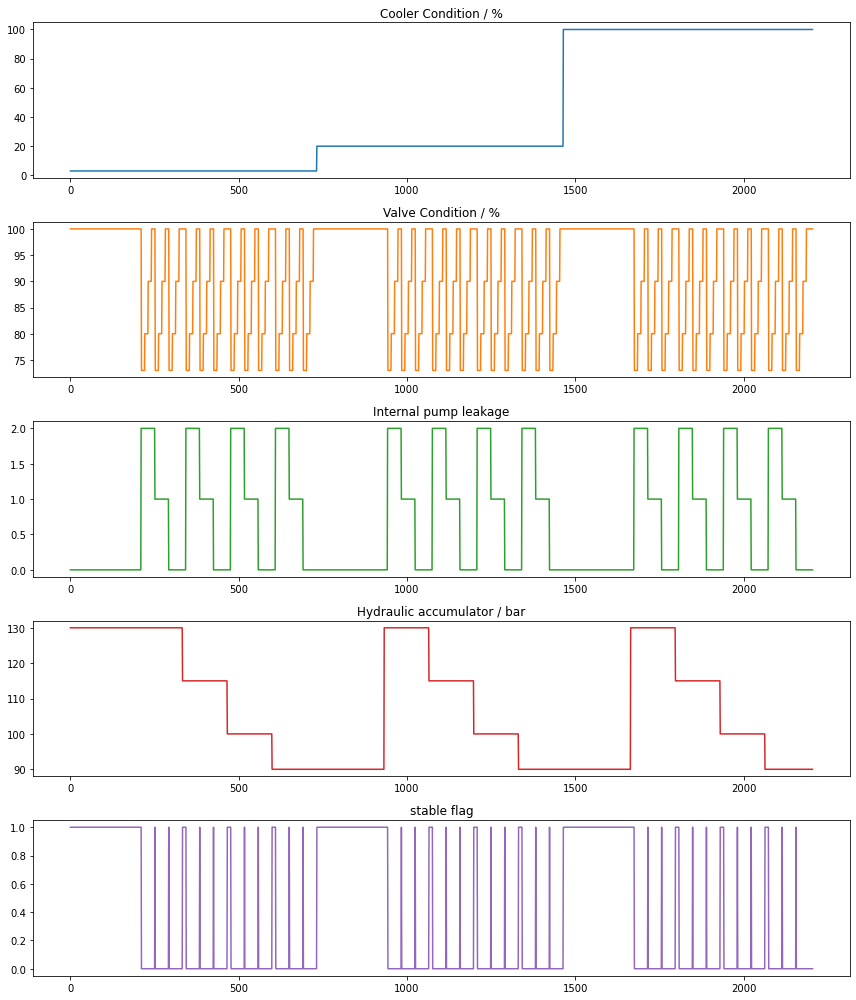

In [14]:
fig, ax = plt.subplots(5, 1, figsize=(12,14), tight_layout='tight')
x_axis = df.index
for col in range(len(target_cols)):
    ax[col].plot(x_axis, df[target_cols[col]], c=colors[col])
    ax[col].set_title(target_cols[col])
plt.show()

## Next Steps
Because the there is so much test data I need to setup a workflow that also me to iterate over it
in many different ways. I think I am currently well positioned to do that, because I have my target
variables all in a single DataFrame object and each of the sensor tables in its own separate df.

### Tables as Columns, Rows as Cells
With the data structured the way it is I want to test out different ways of aggregating it into the
test frame. There are essentially several thousand columns of data for each cycle. However, my
plan now is to iterate through each table of sensor data and decide how to aggregate it for each
each row. So, the simplest way to do this would be to collapse each table into a single column that
captures the average value of each row.

I can then expand the functionality of my iterating process to output standard-deviations, averages,
and min/max values for each row. Then maybe test the effect of binning rows down to some proportion
of their original size.

The first thing to do that may come in handy is to make a dicitonary that holds the hertz values 
for each sensor table. I could do this by hand but it will probably be easier to just write a loop.

## Feature Extraction
I want to establish my intial goals for the feature extraction and testing:
1. A function to return simple averages for each sensor table.
2. A function to return summary statistics for each cycle from the sensor tables.
3. A function to return summary statistics for each cycle as thirds of the cycle (20 seconds of
   sensor data).
4. A function that returns the average change in sensor values for each cycle of sensor data.

Iteratively test each of these sets of columns together and separately against each of the target
variables to see which features produce the most accurate predicitons.

### Additional Features to Try
* average rate of change during each cycle.

### Things to make sure to check for:
* distributions of sensor datas
* NaNs
* outliers

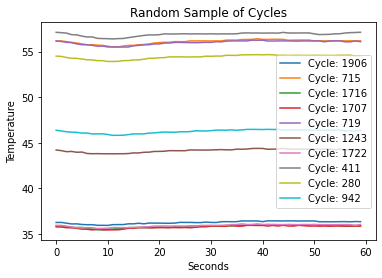

In [15]:
fig, ax = plt.subplots()
for num in range(10):
    rand_row = np.random.randint(0, 2204)
    x_val = tables['TS1'].iloc[[rand_row]].columns
    y_val = tables['TS1'].iloc[[rand_row]].values.flatten()
    ax.set_title('Random Sample of Cycles')
    ax.plot(x_val, y_val, label=f"Cycle: {rand_row}")
ax.set(xlabel="Seconds", ylabel="Temperature")
ax.legend()
plt.show()

### First Feature
So this will be the basic pattern for feature extraction. Not too bad, I will need to write functions
to capture features beyond basic aggregations.

### Feature: 60sec Mean Readings

In [16]:
feature_avg = pd.DataFrame()
for table in tables.keys():
    col_name = "avg_"
    feature_avg[table] = tables[table].apply(np.mean, axis=1) 
feature_avg.head()

,SE,PS1,TS4,PS2,PS3,TS3,VS1,TS2,PS6,PS4,TS1,PS5,CP,CE,EPS1,FS1,FS2
0,59.157183,160.673492,31.745250,109.466914,1.991475,38.471017,0.576950,40.978767,9.728098,0.0,35.621983,9.842169,1.862750,39.601350,2538.929167,6.709815,10.304592
1,59.335617,160.603320,34.493867,109.354890,1.976234,38.978967,0.565850,41.532767,9.529488,0.0,36.676967,9.635142,1.255550,25.786433,2531.498900,6.715315,10.403098
2,59.543150,160.347720,35.646150,109.158845,1.972224,39.631950,0.576533,42.442450,9.427949,0.0,37.880800,9.530548,1.113217,22.218233,2519.928000,6.718522,10.366250
3,59.794900,160.188088,36.579467,109.064807,1.946575,40.403383,0.569267,43.403983,9.337430,0.0,38.879050,9.438827,1.062150,20.459817,2511.541633,6.720565,10.302678
4,59.455267,160.000472,37.427900,108.931434,1.922707,41.310550,0.577367,44.332750,9.260636,0.0,39.803917,9.358762,1.070467,19.787017,2503.449500,6.690308,10.237750


In [17]:
%reload_ext autoreload
%autoreload 1 
%aimport features 
%aimport graph_tool

In [18]:
from graph_tool import make_array, hist_grid
from features import avg_change, table_apply

### Average Change Feature
Here I am adding a feature that represents the average change in sensor readings over each 60 second
cylce. Because we have a bunch of dataframes in a dictionary I wrote a simple helper function to
make feature extraction easier. That code as well as the averaging function being applied is in
`features.py`.

In [19]:
avg_dx = table_apply(tables, avg_change, suffix='dx_avg', axis=1)
avg_dx.head()

,dx_avg_SE,dx_avg_PS1,dx_avg_TS4,dx_avg_PS2,dx_avg_PS3,dx_avg_TS3,dx_avg_VS1,dx_avg_TS2,dx_avg_PS6,dx_avg_PS4,dx_avg_TS1,dx_avg_PS5,dx_avg_CP,dx_avg_CE,dx_avg_EPS1,dx_avg_FS1,dx_avg_FS2
0,0.003814,0.006083,0.054102,-0.020738,-0.000384,0.004644,-0.001034,0.004898,0.000000e+00,0.0,0.009864,0.000000e+00,-0.013576,-0.310780,0.042574,-0.015008,-0.000003
1,0.005610,0.005063,0.024966,-0.020655,-0.000380,0.009661,-0.000949,0.014356,3.333889e-06,0.0,0.022390,2.333722e-06,-0.004237,-0.095254,0.034739,-0.014888,0.000017
2,0.000559,0.005064,0.017085,-0.020702,-0.000371,0.013712,-0.000746,0.015356,2.333722e-06,0.0,0.019203,2.333722e-06,-0.000949,-0.034492,0.034706,-0.015324,0.000057
3,0.004068,0.005038,0.014492,-0.020711,-0.000387,0.014169,-0.000390,0.016085,-8.334722e-07,0.0,0.014034,-5.000833e-07,-0.000169,-0.019271,0.033306,-0.015077,0.000047
4,0.001763,0.004989,0.012915,-0.020616,-0.000375,0.013966,-0.000559,0.014237,1.666944e-07,0.0,0.015763,2.333722e-06,0.000339,-0.007525,0.033272,-0.014568,0.000012


### Graph Tools
Below is a grid of histogram data displaying the distributions for each column in the Average Change
dataframe. The code and documentation for how to use the hist_grid function is in the graph_tool.py
file in this repo.

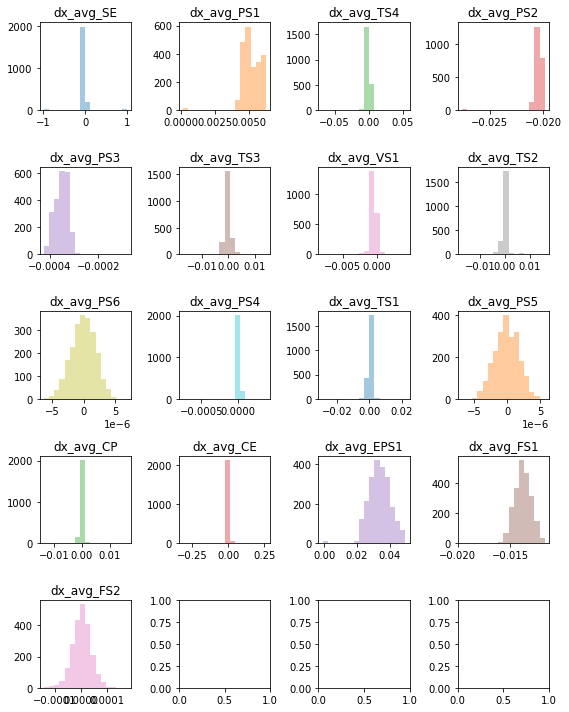

In [20]:
hist_grid(avg_dx, size=2, grid_cols=4, force_col=True)
plt.show()

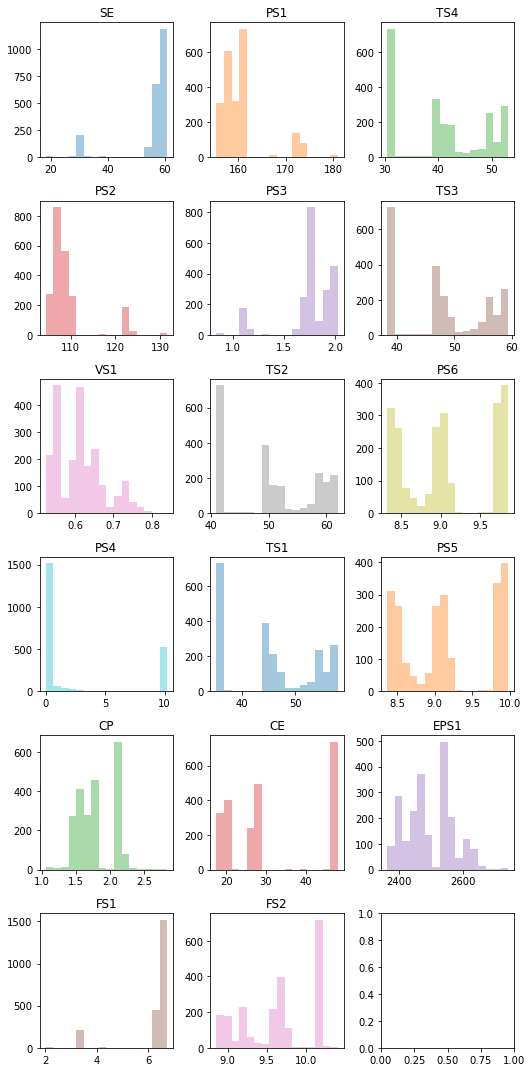

In [21]:
hist_grid(feature_avg, grid_cols=3, force_col=True)
plt.show()

## Modeling - Cooler Condition Target Variable

In [22]:
#Set the first model's X and y variables
#Here, we will include all of the columns in our feature averages data frame
model1_X = feature_avg[list(feature_avg.columns)]
model1_y = df['Valve Condition / %']

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputClassifier

# shuffle and split, stratify keeps target distribution same in train/test
model1_X_train, model1_X_test, model1_y_train, model1_y_test = train_test_split(model1_X, 
                                                                                model1_y, 
                                                                                test_size = 0.15, 
                                                                                random_state = 42)

model1_steps = [('std_scaler', StandardScaler()),
        ('dec_tree', DecisionTreeClassifier(random_state = 42))]

model1_pipeline = Pipeline(model1_steps)


# Train the pipeline (tranformations & predictor)
model1_pipeline.fit(model1_X_train, model1_y_train)

model1_prediction = model1_pipeline.predict(model1_X_test)
print(model1_prediction)


# pipe = Pipeline([('mms', MinMaxScaler()),
#                  ('tree', DecisionTreeClassifier(random_state=123))])

# Create the grid parameter
# grid = [{'tree__max_depth': [None, 2, 6, 10], 
#          'tree__min_samples_split': [5, 10]}]

[ 90  80 100  80 100  80 100  90 100  80  80  73 100 100  73  73  80 100
 100 100  90  73 100  73  90  73  80  73  90 100  80 100 100  73 100  73
 100  73 100  90 100 100 100 100 100  90  73 100  80  73 100 100 100 100
 100  73 100 100 100 100  80  73 100 100 100 100  90  90 100 100  90  90
  73  90  90  73 100  80 100  90  73  80  90 100  90  73  90 100  73 100
 100  73  80  90  80 100 100  80  90  90 100  90 100 100  90  90 100  73
  90 100  90  80  90 100  73 100  90 100 100  90 100 100 100  90 100  73
  90  73 100  80 100  80 100  80 100 100 100 100  80 100  90 100 100 100
  90  90 100 100  80  73 100  73  73  90 100 100 100 100 100 100 100 100
  73 100  80 100 100  73  90 100  80 100  73  90 100  73 100  73 100 100
 100 100 100 100 100  90  73  80 100  73 100 100  80  80  73 100  73 100
  73 100  73  73 100  80 100 100  90  73  73  73  80 100  90 100  90 100
 100  80 100  90 100 100  80  90  90  73  80  80  73  80 100  73 100  80
  90 100 100 100 100 100 100 100  73 100 100  90 10

In [24]:
model1_pipe_grid = {'dec_tree__criterion': ['gini', 'entropy'],
                   'dec_tree__max_depth': [2,4,6,8,10,12]}

model1_gs_pipe = GridSearchCV(estimator = model1_pipeline, 
                       param_grid = model1_pipe_grid, scoring = 'precision_micro')

model1_gs_pipe.fit(model1_X_train, model1_y_train);

In [25]:
model1_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'std_scaler', 'dec_tree', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'dec_tree__ccp_alpha', 'dec_tree__class_weight', 'dec_tree__criterion', 'dec_tree__max_depth', 'dec_tree__max_features', 'dec_tree__max_leaf_nodes', 'dec_tree__min_impurity_decrease', 'dec_tree__min_impurity_split', 'dec_tree__min_samples_leaf', 'dec_tree__min_samples_split', 'dec_tree__min_weight_fraction_leaf', 'dec_tree__presort', 'dec_tree__random_state', 'dec_tree__splitter'])

In [26]:
model1_pipeline.steps

[('std_scaler', StandardScaler()),
 ('dec_tree', DecisionTreeClassifier(random_state=42))]

In [27]:
model1_gs_pipe.best_params_

{'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 12}

In [28]:
model1_gs_pipe.score(model1_X_test, model1_y_test)

0.945619335347432

In [29]:
list(zip(model1_X_train.columns,model1_gs_pipe.best_estimator_.named_steps['dec_tree'].feature_importances_))

[('SE', 0.19453615674767707),
 ('PS1', 0.24072435174629786),
 ('TS4', 0.008120623820818783),
 ('PS2', 0.41797712572775064),
 ('PS3', 0.00573676023908782),
 ('TS3', 0.004217715390275393),
 ('VS1', 0.006428939722140738),
 ('TS2', 0.02282218153058899),
 ('PS6', 0.02832479075636813),
 ('PS4', 0.012805097334171808),
 ('TS1', 0.02383439741064216),
 ('PS5', 0.022922254314251395),
 ('CP', 0.00099364935334394),
 ('CE', 0.0030540777979573704),
 ('EPS1', 0.0029809480600318196),
 ('FS1', 0.004520930048596072),
 ('FS2', 0.0)]

## Modeling - Multiple Model Testing - 

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

model1_lr_pipe = Pipeline([('scaler', StandardScaler()),
                    ('lr', LogisticRegression(random_state = 42))])

model1_dtree_pipe = Pipeline([('scaler', StandardScaler()),
                    ('dtree',DecisionTreeClassifier(random_state = 42))])

model1_rf_pipe = Pipeline([('scaler', StandardScaler()),
                    ('rf',RandomForestClassifier(random_state = 42))])

model1_knn_pipe = Pipeline([('scaler', StandardScaler()),
                    ('knn', KNeighborsClassifier())])

model1_svm_pipe = Pipeline([('scaler', StandardScaler()),
                     ('svm', svm.SVC(random_state = 42))])

model1_xgb_pipe = Pipeline([('scaler', StandardScaler()),
                     ('xgb', XGBClassifier(random_state = 42))])

In [31]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [.1, .2, .3]

lr_param_grid = [{'lr__penalty': ['l1', 'l2'],
                   'lr__C': param_range_fl,
                   'lr__solver': ['liblinear']}]

dtree_param_grid = [{'dtree__criterion': ['gini', 'entropy'],
                   'dtree__min_samples_leaf': param_range,
                   'dtree__max_depth': param_range,
                   'dtree__min_samples_split': param_range[1:]}]

rf_param_grid = [{'rf__min_samples_leaf': param_range,
                   'rf__max_depth': param_range,
                   'rf__min_samples_split': param_range[1:]}]

knn_param_grid = [{'knn__n_neighbors': param_range,
                   'knn__weights': ['uniform', 'distance'],
                   'knn__metric': ['euclidean', 'manhattan']}]

svm_param_grid = [{'svm__kernel': ['linear', 'rbf'], 
                    'svm__C': param_range}]

xgb_param_grid = [{'xgb__learning_rate': learning_rates,
                    'xgb__max_depth': param_range,
                    'xgb__min_child_weight': param_range[:2],
                    'xgb__subsample': param_range_fl,
                    'xgb__n_estimators': n_estimators}]

In [32]:
lr_grid_search = GridSearchCV(estimator = model1_lr_pipe,
        param_grid = lr_param_grid,
        scoring = 'accuracy',
        cv = 3)

dtree_grid_search = GridSearchCV(estimator = model1_dtree_pipe,
        param_grid = dtree_param_grid,
        scoring = 'accuracy',
        cv = 3)

rf_grid_search = GridSearchCV(estimator = model1_rf_pipe,
        param_grid = rf_param_grid,
        scoring = 'accuracy',
        cv = 3)

knn_grid_search = GridSearchCV(estimator = model1_knn_pipe,
        param_grid = knn_param_grid,
        scoring ='accuracy',
        cv = 3)

svm_grid_search = GridSearchCV(estimator = model1_svm_pipe,
        param_grid = svm_param_grid,
        scoring = 'accuracy',
        cv = 3)

xgb_grid_search = GridSearchCV(estimator = model1_xgb_pipe,
        param_grid = xgb_param_grid,
        scoring = 'accuracy',
        cv = 3)

In [33]:
grids = [lr_grid_search, dtree_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]

for i in grids:
    i.fit(model1_X_train, model1_y_train)

In [48]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],\
    model.score(model1_X_test, model1_y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.8731117824773413
Logistic Regression Best Params: {'lr__C': 1.0, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.7915407854984894
Decision Trees Best Params: {'dtree__criterion': 'gini', 'dtree__max_depth': 6, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 6}
Random Forest Test Accuracy: 0.851963746223565
Random Forest Best Params: {'rf__max_depth': 6, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2}
K-Nearest Neighbors Test Accuracy: 0.918429003021148
K-Nearest Neighbors Best Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
Support Vector Machines Test Accuracy: 0.9788519637462235
Support Vector Machines Best Params: {'svm__C': 6, 'svm__kernel': 'linear'}
XGBoost Test Accuracy: 0.9758308157099698
XGBoost Best Params: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 150, 'xgb__subsample': 0.5}


In [42]:
list(zip(model1_X_train.columns, xgb_grid_search.best_estimator_.named_steps['xgb'].feature_importances_))

[('SE', 0.15434223),
 ('PS1', 0.10391352),
 ('TS4', 0.042160183),
 ('PS2', 0.11320298),
 ('PS3', 0.03422909),
 ('TS3', 0.03639205),
 ('VS1', 0.039523546),
 ('TS2', 0.03813628),
 ('PS6', 0.061233833),
 ('PS4', 0.036147367),
 ('TS1', 0.035341565),
 ('PS5', 0.044516552),
 ('CP', 0.03398353),
 ('CE', 0.035077635),
 ('EPS1', 0.03397002),
 ('FS1', 0.12027811),
 ('FS2', 0.037551474)]

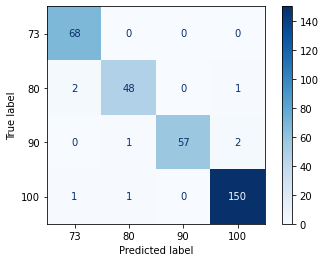

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_grid_search, 
                      model1_X_test, 
                      model1_y_test,
                      cmap = plt.cm.Blues)
plt.show()

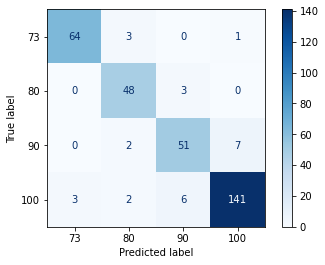

In [54]:
plot_confusion_matrix(knn_grid_search, 
                      model1_X_test, 
                      model1_y_test,
                      cmap = plt.cm.Blues)
plt.show()

## Modeling - Multiple Target Variables